In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We need to predict the survived based on the data. Find out features which affect the survived

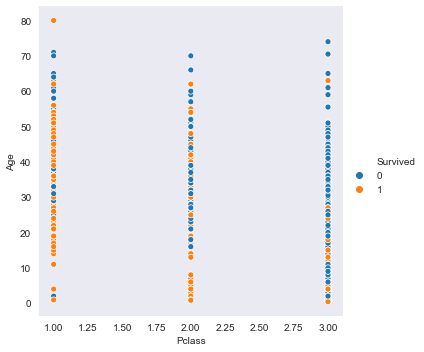

In [35]:
sns.set_style(style = "dark")
sns.relplot(x = 'Pclass', y='Age',hue = 'Survived',data = train)

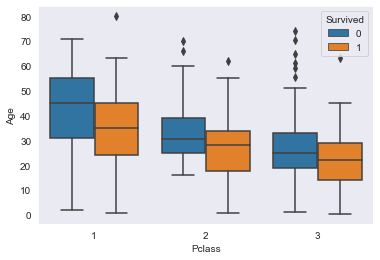

In [37]:
sns.boxplot(x = 'Pclass', y = 'Age',hue = 'Survived',data = train)

In [20]:
def t_age(ele):
    age = ele[0]
    pcl=ele[1]
    if pd.isnull(age):
        if pcl ==1:
            return 39
        elif pcl == 2:
            return 29
        else : return 24
    else : return age


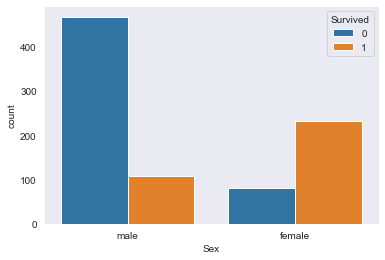

In [39]:
sns.countplot('Sex',hue = 'Survived',data = train)

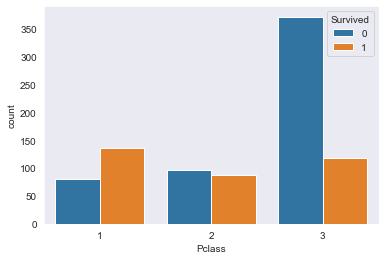

In [40]:
sns.countplot('Pclass',hue = 'Survived',data = train)

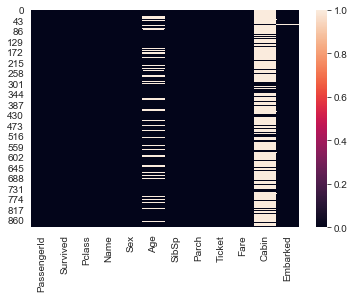

In [41]:
sns.heatmap(train.isnull())

In [45]:
train.groupby("Survived").size()

Survived
0    549
1    342
dtype: int64

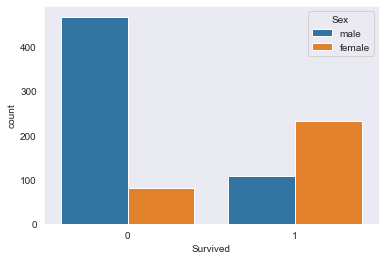

In [47]:
sns.countplot('Survived',hue ='Sex',data = train)

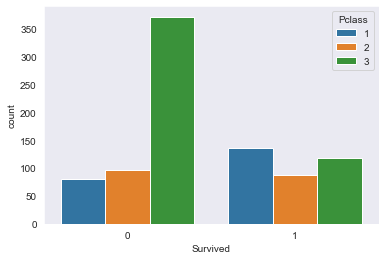

In [48]:
sns.countplot('Survived',hue = 'Pclass',data = train)

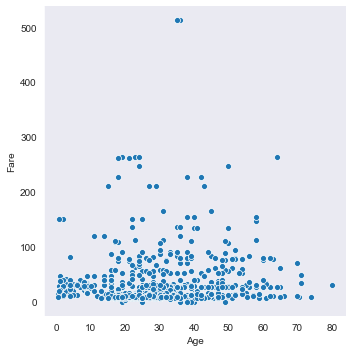

In [54]:
sns.relplot(x='Age',y = 'Fare',data =train)

In [49]:
train1 = train.copy()
train1.Age = train1[['Age','Pclass']].apply(t_age,axis = 1)

In [50]:
train1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
test1 = test.copy()
test1.Age = test1[['Age','Pclass']].apply(t_age,axis = 1)
test1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [104]:
sex = pd.get_dummies(train['Sex'])
train1.Sex = sex.astype(int)
train1.Sex.value_counts()
# males 314 survived and 577 females survived

(891, 2)

In [83]:
test1['Sex'] = pd.get_dummies(test['Sex']).astype(int).copy()
test1.Sex.value_counts()

0    266
1    152
Name: Sex, dtype: int64

In [108]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int32(1), int64(3), object(1)
memory usage: 38.4+ KB


In [84]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int32(1), int64(4), object(4)
memory usage: 34.4+ KB


In [96]:
test1.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked'], dtype='object')

In [135]:
train2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'C', 'Q'], dtype='object')

In [97]:
train1.drop(['Parch', 'Fare'],axis = 1,inplace = True)

In [116]:
test2.drop('Embarked',axis = 1,inplace = True)

In [115]:
embark = pd.get_dummies(test1['Embarked']).astype(int).copy()
embark = embark[['C','Q']]
test2 = pd.concat([test1,embark],axis =1)

In [109]:
train1.dropna()

,Survived,Pclass,Sex,Age,SibSp,Embarked
0,0,3,0,22.0,1,S
1,1,1,1,38.0,1,C
2,1,3,1,26.0,0,S
3,1,1,1,35.0,1,S
4,0,3,0,35.0,0,S
...,...,...,...,...,...,...
886,0,2,0,27.0,0,S
887,1,1,1,19.0,0,S
888,0,3,1,24.0,1,S
889,1,1,0,26.0,0,C


In [117]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass    418 non-null int64
Sex       418 non-null int32
Age       418 non-null float64
SibSp     418 non-null int64
C         418 non-null int32
Q         418 non-null int32
dtypes: float64(1), int32(3), int64(2)
memory usage: 14.8 KB


In [114]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int32
Age         891 non-null float64
SibSp       891 non-null int64
C           891 non-null int32
Q           891 non-null int32
dtypes: float64(1), int32(3), int64(3)
memory usage: 38.4 KB


In [136]:
train3 = train2[['Pclass', 'Sex', 'Age', 'SibSp', 'C', 'Q']]

In [183]:
train2.corr()

,Survived,Pclass,Sex,Age,SibSp,C,Q
Survived,1.000000,-0.338481,0.543351,-0.046230,-0.035322,0.168240,0.003650
Pclass,-0.338481,1.000000,-0.131900,-0.415037,0.083081,-0.243292,0.221009
Sex,0.543351,-0.131900,1.000000,-0.078710,0.114631,0.082853,0.074115
Age,-0.046230,-0.415037,-0.078710,1.000000,-0.244183,0.042870,-0.082939
SibSp,-0.035322,0.083081,0.114631,-0.244183,1.000000,-0.059528,-0.026354
C,0.168240,-0.243292,0.082853,0.042870,-0.059528,1.000000,-0.148258
Q,0.003650,0.221009,0.074115,-0.082939,-0.026354,-0.148258,1.000000


In [150]:
survived = train2.Survived

In [152]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train3,survived,random_state = 0)

In [124]:
x_test.shape

(223, 7)

In [174]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)

In [175]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [176]:
prediction = knn.predict(x_test)
knn.score(x_test,y_test)

In [177]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction))

0.7847533632286996